# Chapter 7 Hypothesis and Inference

## Statistical Hypothesis Testing

## Example: Flipping a Coin

importing Jupyter Notebook from Chapter6.ipynb
P(both | older) = 0.5008888011060636
P(both | either) = 0.3368756641870351


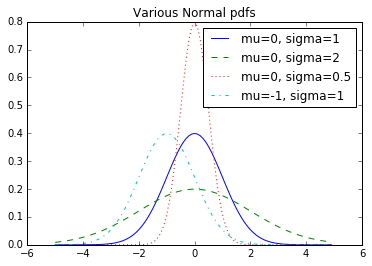

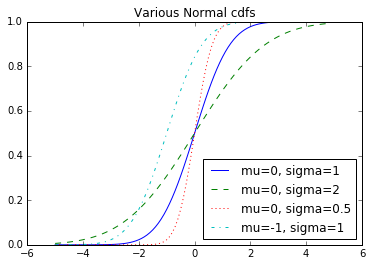

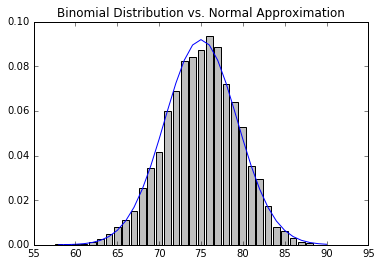

In [1]:
import math
import ipynb2mod
from Chapter6 import normal_cdf
from Chapter6 import inverse_normal_cdf

In [2]:
def normal_approximation_to_binomial(n, p):
    """finds mu and sigma corresponding to a Binomial(n, p)"""
    mu = n * p
    sigma = math.sqrt(n * p * (1 - p))
    return mu, sigma

In [3]:
# the normal cdf _is_ the probability the variable is below a threshold
normal_probability_below = normal_cdf

In [4]:
# it's above the threshold if it's not below the threshold
def normal_probability_above(lo, mu=0, sigma=1):
    return 1 - normal_cdf(lo, mu, sigma)

In [5]:
# it's between if it's less than hi, but not less than lo
def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

In [6]:
# it's outside if it's not between
def normal_probability_outside(lo, hi, mu=0, sigma=1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

In [7]:
def normal_upper_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z <= z) = probability"""
    return inverse_normal_cdf(probability, mu, sigma)

In [8]:
def normal_lower_bound(probability, mu=0, sigma=1):
    """returns the z for which P(Z >= z) = probability"""
    return inverse_normal_cdf(1 - probability, mu, sigma)

In [9]:
def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """returns the symmetric (about the mean) bounds that contain the specified probability"""
    tail_probability = (1 - probability) / 2
    
    # upper bound should have tail_probability above it
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    # lower bound should have tail_probability below it
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound

In [10]:
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print('mu_0: ', mu_0)
print('sigma_0: ',sigma_0)

mu_0:  500.0
sigma_0:  15.811388300841896


In [11]:
normal_two_sided_bounds(0.95, mu_0, sigma_0)

(469.01026640487555, 530.9897335951244)

In [12]:
# 95% bounds based on assumption p is 0.5
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0)

# actual mu and sigma based on p = 0.55
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)

# a type 2 error means we fail to reject the null hypothesis
# which will happen when X is still in our original interval
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability

In [13]:
power

0.886548001295367

## Confidence Intervals

## P-hacking

## Example: Running an A/B Test

## Bayesian Inference